## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 10/10/2022**

In [1]:
# Import all necessary libraries that we will use in this project
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Download the dataset for the project
data = data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

!wget $data

--2022-10-16 14:32:50--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.12’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2022-10-16 14:32:50 (1.68 MB/s) - ‘CreditScoring.csv.12’ saved [182489/182489]



In [3]:
# Print the column names and the first 9 records of the dataset
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [4]:
# Print the data now using Pandas
df = pd.read_csv(data)

In [5]:
# Print the first 5 rows of our daraset
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
# Preparing the data:

# Use the column status we want to translate the numbers into strings
# with text is easier to understand, what this status means

In [7]:
# Lower case all the column names of the dataset
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
# Check the column status and how many values we have
df.status.value_counts()
# we can see we have a variable zero

1    3200
2    1254
0       1
Name: status, dtype: int64

In [9]:
# Convert the column status to string using the map function
# this function map converts to a dictionary every value from 
# the original data frame to some new value
df.status = df.status.map({1: 'ok', 2: 'default', 0: 'unk'}) # unk means unknown
df.status

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [10]:
# Check our dataframe after used the map function
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [11]:
# Now dealing with values: home, marital, records and job
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [12]:
# Check our data frame after used the map function
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [13]:
# Use the method describe that describes the dataset like all the statistics
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [14]:
# Use the method describe with the random function
df.describe().round()
# below we can see income, assets and debt have large numbers as max values
# this max values means the value is missing

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [15]:
# Using another way similar to map function to replace values
# df.income.replace(to_replace=99999999, value=np.nan)

In [16]:
# Create a for loop to update the max value with NaN
for c in ['income', 'assets','debt']:

  # After access the column c we want to replace the value with NaN
  df [c] = df[c].replace(to_replace=99999999, value=np.nan)

In [17]:
# Check the max value is gone from the dataframe
df.describe().round() 
# we can see below we don't have the max value anymore

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [18]:
# Look at the status variable. We have zeros meaning we have missing values
df.status.value_counts()
# below the status zero means unk and we want to remove it

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [19]:
# Filter all records with status, not zero, from the data frame
df[df.status != 0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [20]:
# Reset the index of the data frame
df = df[df.status != 'unk'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [21]:
# Doing the train, validation and test split:

# Import library sklearn the package train test split
from sklearn.model_selection import train_test_split

# Split the data into full train and test dataframe
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

# Split the data into train and validation dataframe
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [22]:
# Reset the index of the train, validation and test dataframes
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [23]:
# Turn the status to a number 1 = true and 0 = false and store in y_train variable
y_train = (df_train.status == 'default').astype('int').values

# Do the same to validation and test dataframes
y_val  = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [24]:
# Remove the default variables from train, validation and test dataframes
del df_train['status']
del df_val['status']
del df_test['status']

In [25]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [26]:
# Applying Decision Trees:

# Create asses risk function
def assess_risk(client):

  # Check the customer has a record
  if client['records'] == 'yes':

    # Check the customer job is part-time
    if client['job'] == 'parttime':
      return 'default'
    else:
      return 'ok'
  else:
    # Check the customer have more than 6k in assets
    if client['assets'] > 6000:
      return 'ok'
    else:
      return 'default'

In [27]:
# Convert the first record from the train dataframe into a dictionary
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [28]:
# Use the assess risk function with our customer
assess_risk(xi)

'ok'

In [29]:
# Now we can train using the rules created above
# so we can learn these rules from the data using the decision tree algorithm
# and for that we are using the sklearn

# Import sklearn with the package Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Use dictionary vectorizer because we have categorical variables
from sklearn.feature_extraction import DictVectorizer

In [31]:
# Import sklearn with the ROC AUC score
from sklearn.metrics import roc_auc_score

In [32]:
# Import the library warnings to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Turn our train dataframe into a list of dictionaries
# and then turn the list of dictionaries into the feature matrix
# and then after we will train the model
# Use the fillna function to fill the NaN with zeros
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [34]:
# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the function transform with our DictVectorizer
X_train = dv.fit_transform(train_dicts)

In [35]:
# Look and check at the feature names
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [36]:
# Train our decision tree
dt = DecisionTreeClassifier()

# For training the model we use the fit method
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Test our model:

# Use the validation dataframe to transform to a list of dictionaries
val_dicts = df_val.fillna(0).to_dict(orient='records')

# Use the function transform with our DictVectorizer
X_val = dv.transform(val_dicts)

In [38]:
# Apply our model on X validation and use the first column
y_pred = dt.predict_proba(X_val)[:, 1]

In [39]:
# Compute the ROC AUC score
roc_auc_score(y_val, y_pred)

0.6577159671599139

In [40]:
# Let's see the ROC AUC score for our train dataframe:

# Apply our model on X train and use the first column
y_pred = dt.predict_proba(X_train)[:, 1]

# Compute the ROC AUC score
roc_auc_score(y_train, y_pred)
# the score below is 100%, and it's excellent but 
# the model learned from the data, and we don't want this

1.0

In [41]:
# Retrain the tree so the model doesn't learn from the data
# and for that we control the depth of the tree

# Train our decision tree with max depth of 3 levels
dt = DecisionTreeClassifier(max_depth=2)

# For training the model we use the fit method
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
# Apply our model on X train and use the first column
y_pred = dt.predict_proba(X_train)[:, 1]

# Compute the ROC AUC score
auc = roc_auc_score(y_train, y_pred)

# Print the result of the ROC AUC score for the train dataframe
print('Train:', auc)

# Apply our model on X train and use the first column
y_pred = dt.predict_proba(X_val)[:, 1]

# Compute the ROC AUC score
auc = roc_auc_score(y_val, y_pred)

# Print the result of the ROC AUC score for the validation dataframe
print('Validation:', auc)

# below, the performance of our model on the validation dataframe is significantly better
# it's 73% compared to 65%

Train: 0.7054989859726213
Validation: 0.6685264343319367


In [43]:
# Use sklearn tree that helps to visualise trees
from sklearn.tree import export_text

In [44]:
# Print the train decision tree
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0



In [45]:
# Print the train decision tree with feature names
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [46]:
# Decision Tree Learning Algorithm:

# Use simple data for decision tree learning algorithm
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [47]:
# Convert the data to a dataframe example
df_example = pd.DataFrame(data)
df_example

,0,1
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [48]:
# Define the column names of the example dataframe
df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [49]:
# Use the numerical column assets to train our decision tree
# using the assets column 

# Sort the dataframe example by assets
df_example.sort_values('assets')

# below we can see the assets values and we want to come up
# with a rule assets greater than threshold and the possibilities
# are split the dataframe with left part T = 2000 T = 3000 and then cut the dataframe
# and then the right part with T = 4000 T = 5000 and T = 8000
# note: we don't need assets with zero because is the first node
# and we don't need the last node with 9000
# so the potential thresholds are: 2000, 3000, 4000, 5000 and 8000

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [50]:
# Create a list with the potential thresholds
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [51]:
# Import library display from Python
from IPython.display import display

In [52]:
# now we want to cut our dataframe example in the left and right side
# and see which split is the best one

# Create a for loop to use our list of thresholds
for T in Ts:

  # Print the threshold value
  print(T)

  # Split the data if the assets are equal or less greater than the threshold
  df_left = df_example[df_example.assets <= T]

  # Split the data if the assets are equal or greater than the threshold
  df_right = df_example[df_example.assets > T]

  # Print data from the left and right of the dataframe example
  display(df_left)
  display(df_right)

  # Print blank line
  print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


In [53]:
# Now we have many splits, and we want to know which split
# is the best for our evaluating because we have different evaluation criteria
# or split evaluation criteria 

# Let's have an example using the threshold with 4000
T = 4000

# Split the data if the assets are equal or less greater than the threshold
df_left = df_example[df_example.assets <= T]

# Split the data if the assets are equal or greater than the threshold
df_right = df_example[df_example.assets > T]

# Print data from the left and right of the dataframe example
display(df_left)

# Use the function value counts with status and normalize set to true to return ratios
# instead of the absolute number
print(df_left.status.value_counts(normalize=True))

# Use the function value counts with status and normalize to the right side now
display(df_right)
print(df_right.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64


In [54]:
# To understand how good our predictions are here, we can look at
# misclassification rate and is when we predict everyone as default
# how many errors we make, so what is the fraction of errors here 
# we can see above start from the top we have 3 default and 1 ok
# so we predict everyone as default and we'll make one error out of 4
# because we have 4 assets and our misclassification rate is 25%
# and this will be our left. 
# On the right we have 3 ok and one default so then we predict everyone is okay
# and we have missed classification rate of 25% 
# doing this we can evaluate the quality of our split 
# so for T = 4000 we get 25 error rate misclassification rate
# on the left 25% and on the right 25%, and then we can take an average
# and the average is 25%, and we can say if we use this T = 4000 as the split, then
# the average misclassification rate is 25% 
# we don't have to take coverage so that we can take a weighted average, for example
# we have one example on the left and eight examples on the right, and it makes more
# it makes sense to take a weighted average so that we will use the one example of more weight
# but for simplicity, we will use the usual average
# in real life, the way these algorithms work is they use a weighted average

In [55]:
# Now let's do the same but now inside of for loop:

# Create a for loop to use with the list of thresholds
for T in Ts:

  # Print the threshold value
  print(T)

  # Split the data if the assets are equal or less greater than the threshold
  df_left = df_example[df_example.assets <= T]

  # Split the data if the assets are equal or greater than the threshold
  df_right = df_example[df_example.assets > T]

  # Print data from the left and right of the dataframe example
  display(df_left)

  # Use the function value counts with status and normalize set to true to return ratios
  # instead of the absolute number
  print(df_left.status.value_counts(normalize=True))

  # Use the function value counts with status and normalize to the right side now
  display(df_right)
  print(df_right.status.value_counts(normalize=True))

  # Print blank line
  print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [56]:
# Use simple data for decision tree learning algorithm

# Add a second column feature called debt to the dataset
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

# Define the column names of the example dataframe
df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [57]:
# Sort the values by debt with the dataframe example
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [58]:
# Look at the table above. We can see we can split the dataset by:
# 500, 1000 and 2000 (we look at the values with status ok)

# Create a dictionary with values collected from assets and debt
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [59]:
# Iterate over each of the customers for feature and threshold items
for feature, Ts in thresholds.items():

  # Print the feature name of the dataframe
  print('#######################')
  print(feature)
  
  # Iterate over the list of thresholds
  for T in Ts:

    # Now instead of doing with assets we do for all features
  
    # Print the threshold value
    print(T)

    # Split the data if the assets are equal or less greater than the threshold
    # df_left = df_example[df_example.assets <= T]
    df_left = df_example[df_example[feature] <= T]

    # Split the data if the assets are equal or greater than the threshold
    # df_right = df_example[df_example.assets > T]
    df_right = df_example[df_example[feature] > T]

    # Print data from the left and right of the dataframe example
    display(df_left)

    # Use the function value counts with status and normalize set to true to return ratios
    # instead of the absolute number
    print(df_left.status.value_counts(normalize=True))

    # Use the function value counts with status and normalize to the right side now
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    # Print blank line
    print()

# Print a separate line for better visualization of the data
print('#######################')

#######################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#######################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#######################


In [60]:
# Decision Tree Learning Algorithm:
# . Find the best split
# . Stop IF Max_Depth is reached
# . IF LEFT is sufficiently large
#        AND NOT pure:
#.         REPEAT FOR LEFT
# . IF RIGHT is sufficiently large
#        AND NOT pure:
#.         REPEAT FOR RIGHT

In [61]:
# Decision Tree Parameter Tunning:
# . Selecting max_depth
# . Selecting min_samples_leaf

In [62]:
# Iterate over different values of max depth
# None means no restriction and it should grow tree as deep as possible
# as many layers as possible 
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20 , None]:

  # Train a decision tree by adjusting the max depth parameter
  dt = DecisionTreeClassifier(max_depth=d)

  # For training the model we use the fit method
  dt.fit(X_train, y_train)

  # Apply our model on X validation and use the first column
  y_pred = dt.predict_proba(X_val)[:, 1]

  # Compute the ROC AUC score
  auc = roc_auc_score(y_val, y_pred)

  # Print the depth and the AUC rounded to 3 digits
  # 4s means 4 characters and it keeps it aligned
  print('%4s -> %.3f' % (d, auc))

  # below we can see the best values are 4, 5 and 6 with 76%
  # we can say this three are good ones so our three should have 
  # the depth from 4 to 6 layers

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.747
  10 -> 0.700
  15 -> 0.652
  20 -> 0.667
None -> 0.654


In [63]:
# now we know what are the best depth parameters (4, 5 and 6)
# we can do now is for each of these depth values we can try
# different mean sample leaf values and see what happens

# Declare list scores to store the results
scores = []

# Crete a for loop for our best depth parameters (4, 5 and 6)
for d in [4, 5, 6]:

  # Iterate over different values for the other parameter the mean sample leaf
  for s in [1, 5, 10, 15, 20, 100, 200, 500]:

    # Train a decision tree by adjusting the max depth and min samples leaf parameters
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)

    # For training the model we use the fit method
    dt.fit(X_train, y_train)

    # Apply our model on X validation and use the first column
    y_pred = dt.predict_proba(X_val)[:, 1]

    # Compute the ROC AUC score
    auc = roc_auc_score(y_val, y_pred)

    # Print the max depth, min sample leaf and the AUC rounded to 3 digits
    # 4s means 4 characters and it keeps it aligned
    print('(%4s, %3d) -> %.3f' % (d, s, auc))
    # Change the print to append the list of scores
    scores.append((d, s, auc))

# Create dataframe scores to store the scores list
# Declare the names of the columns of the dataframe scores
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

(   4,   1) -> 0.761
(   4,   5) -> 0.761
(   4,  10) -> 0.761
(   4,  15) -> 0.764
(   4,  20) -> 0.761
(   4, 100) -> 0.756
(   4, 200) -> 0.747
(   4, 500) -> 0.680
(   5,   1) -> 0.767
(   5,   5) -> 0.768
(   5,  10) -> 0.762
(   5,  15) -> 0.772
(   5,  20) -> 0.774
(   5, 100) -> 0.763
(   5, 200) -> 0.759
(   5, 500) -> 0.680
(   6,   1) -> 0.759
(   6,   5) -> 0.762
(   6,  10) -> 0.778
(   6,  15) -> 0.785
(   6,  20) -> 0.774
(   6, 100) -> 0.776
(   6, 200) -> 0.768
(   6, 500) -> 0.680


In [64]:
# Print the first 5 rows of data from the dataframe scores
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


In [65]:
# Print the values of AUC by descending order
df_scores.sort_values(by='auc', ascending=False).head()

# we can see below the depth of 6 seems to be the best one
# when we put a limit on the size of the leaf

,max_depth,min_samples_leaf,auc
19,6,15,0.785474
18,6,10,0.777521
21,6,100,0.776434
20,6,20,0.774279
12,5,20,0.773537


In [66]:
# Turn the dataframe scores into a dataframe where omn the rows we have
# min_samples_leaf and columns we have max_depth and the cells will be AUC
# Use function pivot with dataframe scores and create a dataframe scores pivot
# index is the row in our case is min_samples_leaf
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

# we can see the min_sample_leaf 15 is the largest with 78%

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.759
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

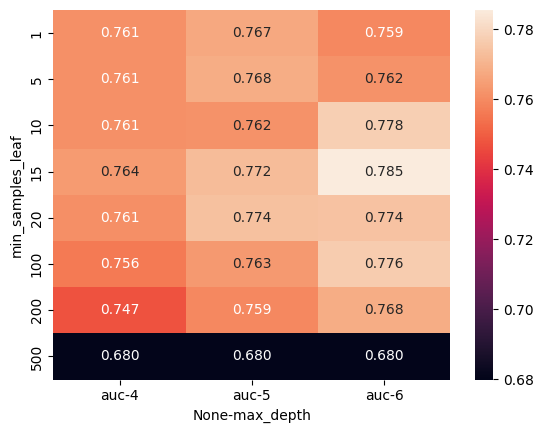

In [67]:
# Visualise the dataframe scores pivot as a heat map 
# use annnot to visualize the values
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

# to check the worst values we look at the darkest background color in this plot is 68%
# to check the best value we look at the light background colot in this plot is 78.1%
# we see at the right side of the plot values start with 78% and ends with 68%
# we can see with the score 78.6% has the max dept of 6 with the AUC and 15 with
# min_sample_leaf

In [68]:
# Train our decision tree by set the parameters max_depth and min_samples_leaf
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# For training the model we use the fit method
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [69]:
# Import the package RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Create RandomForestClassifier with 10 models
# n_estimators are the numbers of models we want to use
rf = RandomForestClassifier(n_estimators=10, random_state=1)

# For training the model we use the fit method
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [71]:
# Apply our model on X validation and use the first column
y_pred = rf.predict_proba(X_val)[:, 1]

In [72]:
# Compute the ROC AUC score
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [73]:
rf.predict_log_proba(X_val[[0]])

array([[-0.10536052, -2.30258509]])

In [74]:
# Iterate over many different values from 10 to 200
# check how the performance of a model improves or changes
# when we increase the number of trees 

# Create list scores to store the results
scores = []

for n in range(10, 201, 10):

  # Create RandomForestClassifier with 10 models
  # n_estimators are the numbers of models we want to use
  rf = RandomForestClassifier(n_estimators=n, random_state=1)

  # For training the model we use the fit method
  rf.fit(X_train, y_train)

  # Apply our model on X validation and use the first column
  y_pred = rf.predict_proba(X_val)[:, 1]

  # Compute the ROC AUC score
  auc = roc_auc_score(y_val, y_pred)

  # Append list scores with results
  scores.append((n, auc))

In [75]:
# Create dataframe scores using the list scores
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


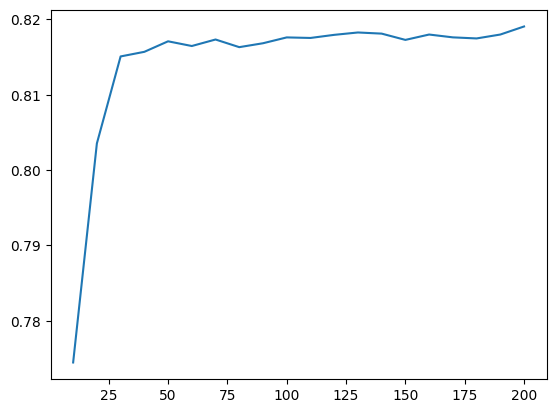

In [76]:
# Plot the dataframe scores
plt.plot(df_scores.n_estimators, df_scores.auc)

In [77]:
# Create list scores to store the results
scores = []

# Iterate using the max depth parameters
for d in [5, 10, 15]:
  for n in range(10, 201, 10):

    # Create RandomForestClassifier with 10 models
    # n_estimators are the numbers of models we want to use
    rf = RandomForestClassifier(n_estimators=n, 
                                max_depth=d,
                                random_state=1)

    # For training the model we use the fit method
    rf.fit(X_train, y_train)

    # Apply our model on X validation and use the first column
    y_pred = rf.predict_proba(X_val)[:, 1]

    # Compute the ROC AUC score
    auc = roc_auc_score(y_val, y_pred)

    # Append list scores with results
    scores.append((d, n, auc))

In [78]:
# Create list with names of the columns of the dataframe scores
columns=['max_depth', 'n_estimators', 'auc']

# Create dataframe scores using the list scores
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


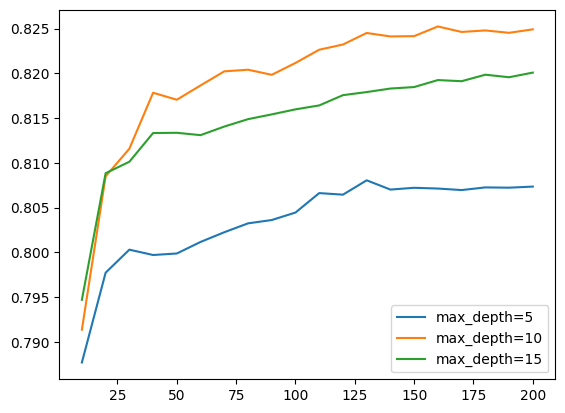

In [79]:
# Create for loop to plot the dataframe scores
for d in [5, 10, 15]:

  # Create dataframe subset with the scores and we filter scores with max depth
  df_subset = df_scores[df_scores.max_depth == d]

  # Plot the dataframe subset with legend
  plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

# Display the legend of the plot
plt.legend()

In [80]:
# Select the best max depth to 10
max_depth = 10